# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower, TTestPower


In [4]:
# H_0 = The new email template incurs the same reponse rate as the current template
# H_1 = The new template has a different response rate than the existing template

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

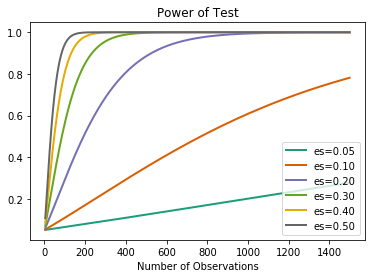

In [6]:
power_analysis = TTestIndPower()
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()

In [9]:
power_analysis.solve_power(effect_size=.01, alpha=.05, power = .8)

156978.1728604922

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

'58396.501 samples are needed for a power of .8 at this alpha level'

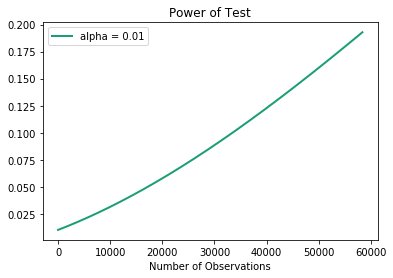

'50181.494 samples are needed for a power of .8 at this alpha level'

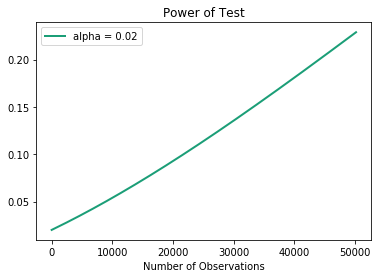

'39245.264 samples are needed for a power of .8 at this alpha level'

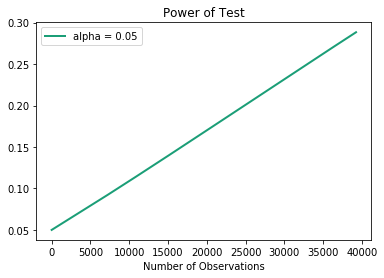

'30911.861 samples are needed for a power of .8 at this alpha level'

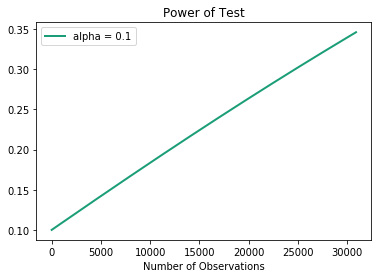

'22514.521 samples are needed for a power of .8 at this alpha level'

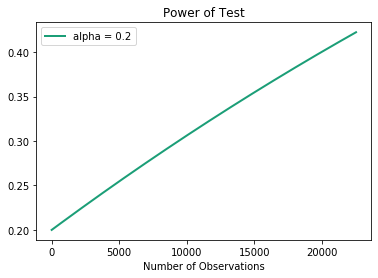

'17514.254 samples are needed for a power of .8 at this alpha level'

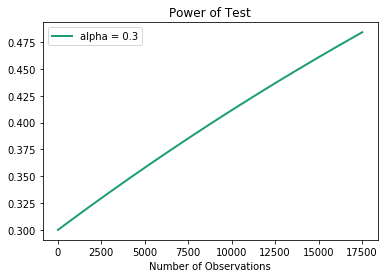

'15555.741 samples are needed for a power of .8 at this alpha level'

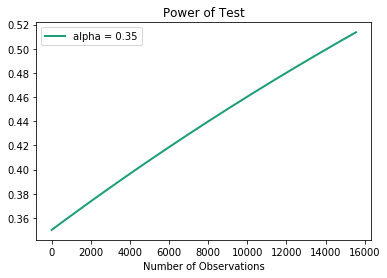

In [65]:
alphas = [.01, .02, .05, .1, .2, .3, .35]
plt.figure()
for i in range(len(alphas)):
    ax = plt.subplot()
    power_analysis = TTestIndPower()
    thing = round(power_analysis.solve_power(effect_size=.02, alpha=alphas[i], power = .8),3)
    power_analysis.plot_power(dep_var='nobs',
                              nobs = np.array(range(5,int(thing))),
                              effect_size=[.01],
                              alpha=alphas[i], ax = ax).gca()
    ax.legend([f'alpha = {alphas[i]}'])
    display(f'{thing} samples are needed for a power of .8 at this alpha level')
    
    plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

I would suggest designing an experiment that centers around being able to detect effect size = .02 with an alpha of alpha = .05. This approach loses only a small amount of resolution while being able to tell you with a fair degree of confidence, whether or not the new template is effective, relative to the existing template. Because this is email related a sample size of 30k is needed. This is likely achieveable in a short window of time given the plateform. 

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.